In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import wget

In [5]:
wget.download('https://raw.githubusercontent.com/facebookresearch/SentEval/master/data/probing/sentence_length.txt')

100% [..........................................................................] 9965996 / 9965996

'sentence_length.txt'

In [6]:
wget.download('https://dissent.s3-us-west-2.amazonaws.com/data/discourse_EN_FIVE_and_but_because_if_when_2017dec12_test.tsv')

100% [........................................................................] 16668907 / 16668907

'discourse_EN_FIVE_and_but_because_if_when_2017dec12_test (1).tsv'

In [7]:
wget.download('https://raw.githubusercontent.com/facebookresearch/SentEval/master/data/probing/subj_number.txt')

100% [..........................................................................] 9266094 / 9266094

'subj_number (1).txt'

In [8]:
wget.download('https://raw.githubusercontent.com/facebookresearch/SentEval/master/data/probing/tree_depth.txt')

100% [..........................................................................] 8141642 / 8141642

'tree_depth (1).txt'

In [14]:
length = pd.read_csv('sentence_length.txt',sep='\t', header=None)
depth = pd.read_csv('tree_depth.txt',sep='\t', header=None)
number = pd.read_csv('subj_number.txt',sep='\t', header=None)
discourse = pd.read_csv('discourse_EN_FIVE_and_but_because_if_when_2017dec12_test.tsv', sep='\t', header=None)

columns = ['part', 'target', 'sent']
length.columns = columns
depth.columns = columns
number.columns = columns
discourse.columns = ['sent_1', 'sent_2', 'target']     

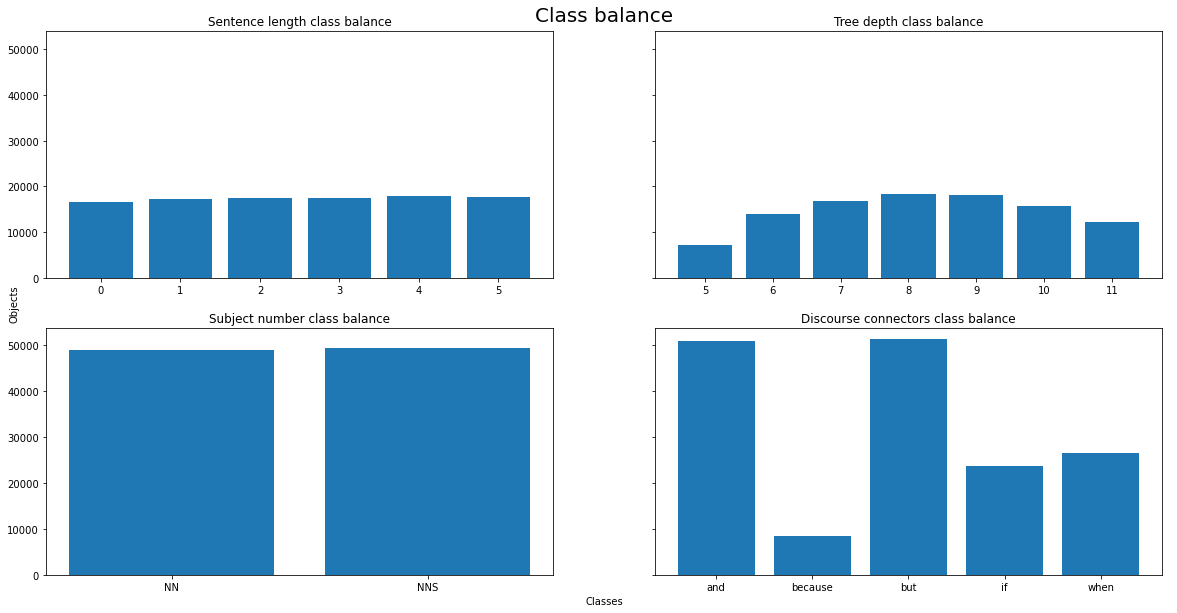

In [73]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True)

b1 = ax[0, 0].bar(np.sort(length['target'].unique()), length.groupby('target').size().tolist())
b1 = ax[0, 0].set_title('Sentence length class balance')
b2 = ax[0, 1].bar(np.sort(depth['target'].unique()), depth.groupby('target').size().tolist())
b2 = ax[0, 1].set_title('Tree depth class balance')
b3 = ax[1, 0].bar(np.sort(number['target'].unique()), number.groupby('target').size().tolist())
b3 = ax[1, 0].set_title('Subject number class balance')
b4 = ax[1, 1].bar(np.sort(discourse['target'].unique()), discourse.groupby('target').size().tolist())
b4 = ax[1, 1].set_title('Discourse connectors class balance')


x0 = min([a.get_position().x0 for e in ax for a in e])
y0 = min([a.get_position().y0 for e in ax for a in e])
x1 = max([a.get_position().x1 for e in ax for a in e])
y1 = max([a.get_position().y1 for e in ax for a in e])

plt.axes([x0, y0, x1 - x0, y1 - y0], frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

# Labelize
plt.xlabel("Classes", size=10)
plt.ylabel("Objects", size=10)
plt.title('Class balance', size=20, pad=10)
plt.show()